In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

In [3]:
raw_data = pd.read_csv('data/train.csv')

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
raw_data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
raw_data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


ps_ind_01


<Container object of 8 artists>

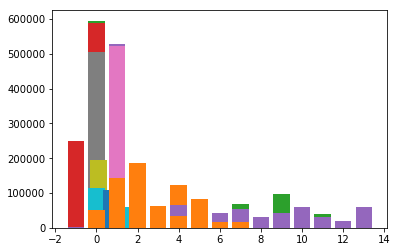

ps_ind_02_cat


<Container object of 5 artists>

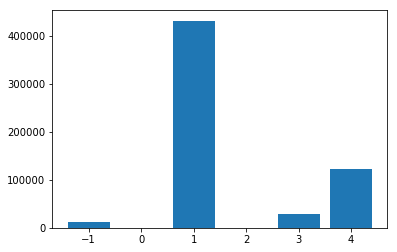

ps_ind_03


<Container object of 12 artists>

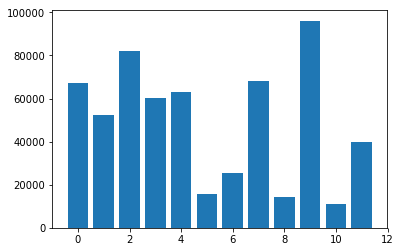

ps_ind_04_cat


<Container object of 3 artists>

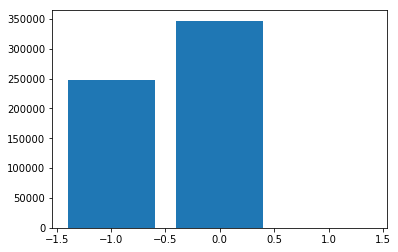

ps_ind_05_cat


<Container object of 8 artists>

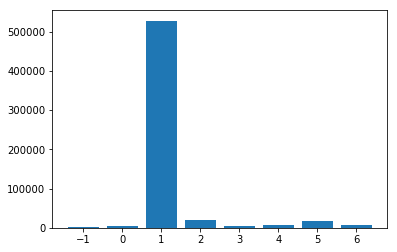

ps_ind_06_bin


<Container object of 2 artists>

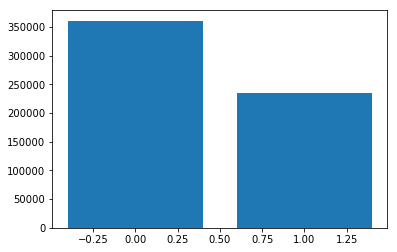

ps_ind_07_bin


<Container object of 2 artists>

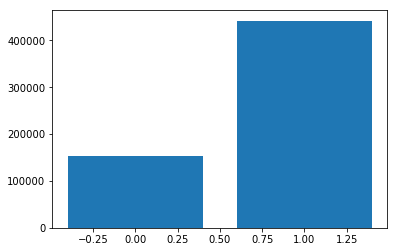

ps_ind_08_bin


<Container object of 2 artists>

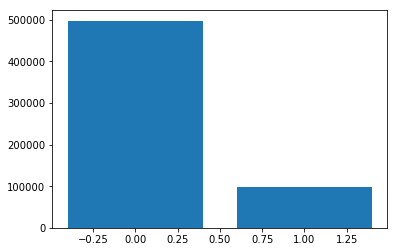

ps_ind_09_bin


<Container object of 2 artists>

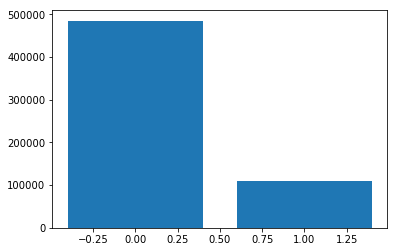

ps_ind_10_bin


<Container object of 2 artists>

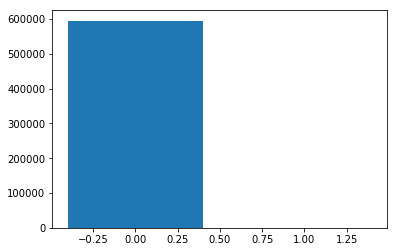

ps_ind_11_bin


<Container object of 2 artists>

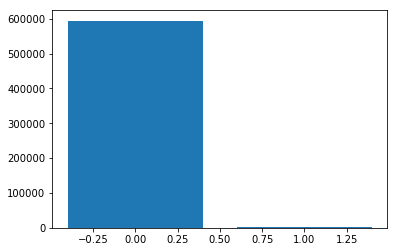

ps_ind_12_bin


<Container object of 2 artists>

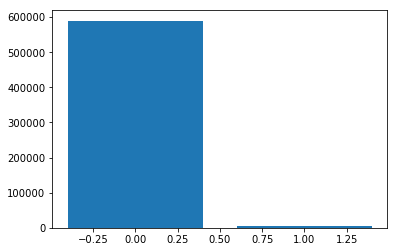

ps_ind_13_bin


<Container object of 2 artists>

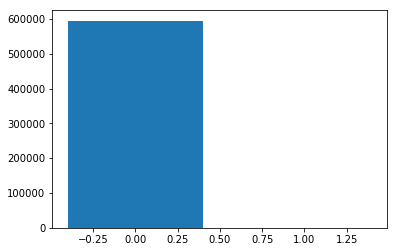

ps_ind_14


<Container object of 5 artists>

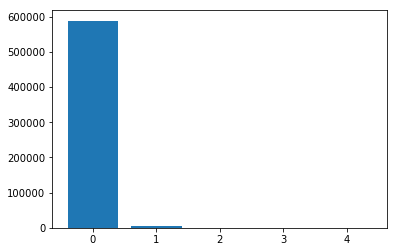

ps_ind_15


<Container object of 14 artists>

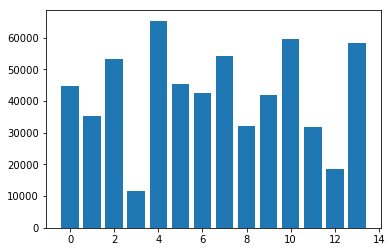

ps_ind_16_bin


<Container object of 2 artists>

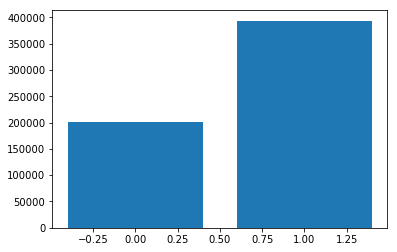

ps_ind_17_bin


<Container object of 2 artists>

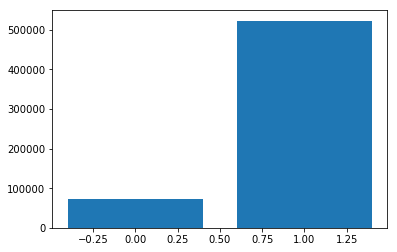

ps_ind_18_bin


<Container object of 2 artists>

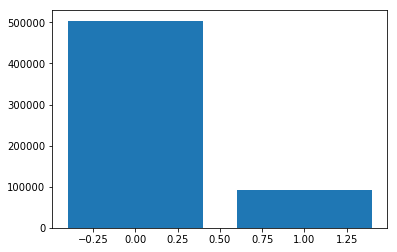

ps_reg_01


<Container object of 10 artists>

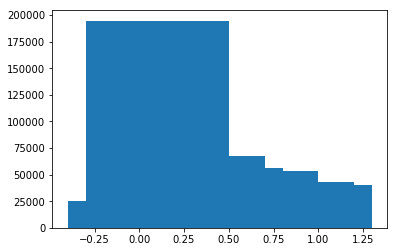

ps_reg_02


<Container object of 19 artists>

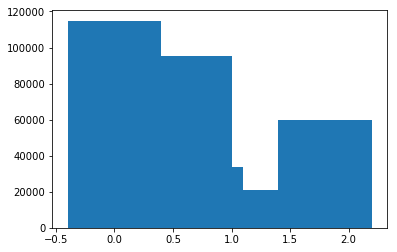

ps_reg_03


<Container object of 5013 artists>

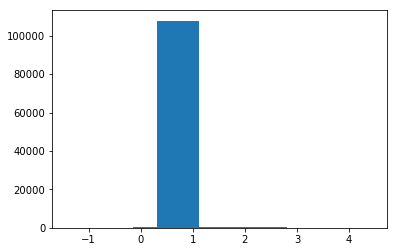

ps_car_01_cat


<Container object of 13 artists>

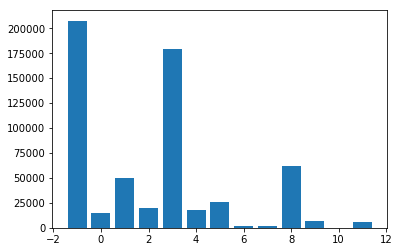

ps_car_02_cat


<Container object of 3 artists>

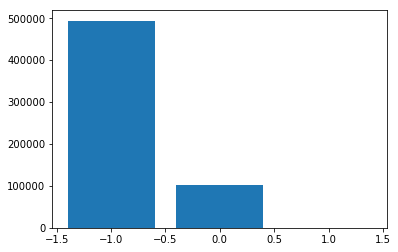

ps_car_03_cat


<Container object of 3 artists>

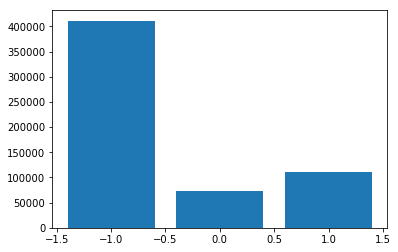

ps_car_04_cat


<Container object of 10 artists>

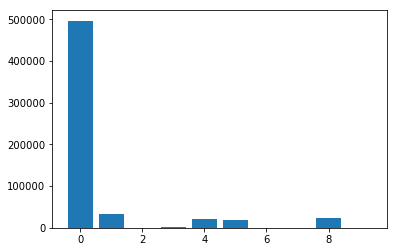

ps_car_05_cat


<Container object of 3 artists>

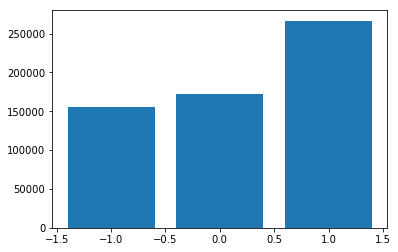

ps_car_06_cat


<Container object of 18 artists>

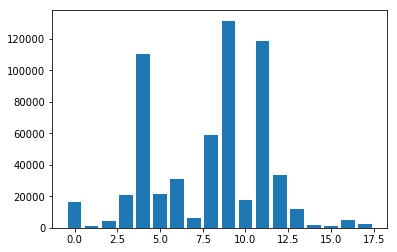

ps_car_07_cat


<Container object of 3 artists>

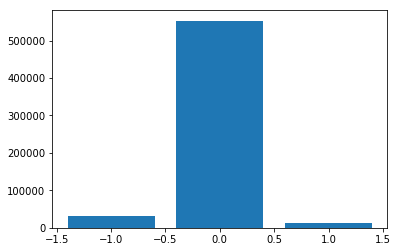

ps_car_08_cat


<Container object of 2 artists>

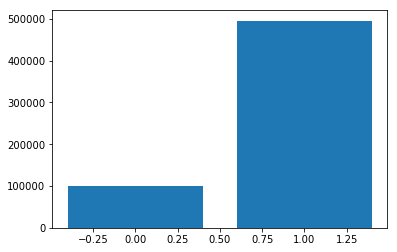

ps_car_09_cat


<Container object of 6 artists>

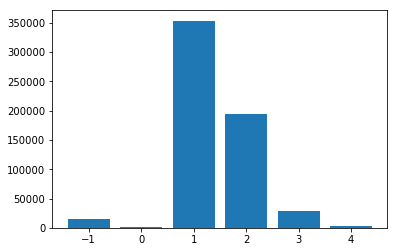

ps_car_10_cat


<Container object of 3 artists>

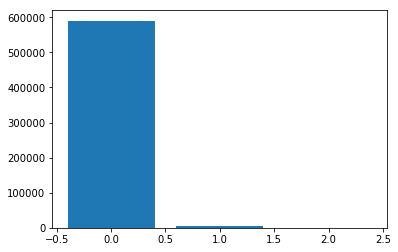

ps_car_11_cat


<Container object of 104 artists>

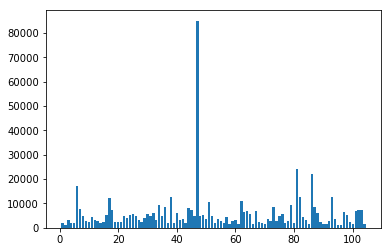

ps_car_11


<Container object of 5 artists>

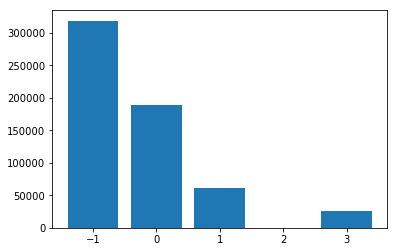

ps_car_12


<Container object of 184 artists>

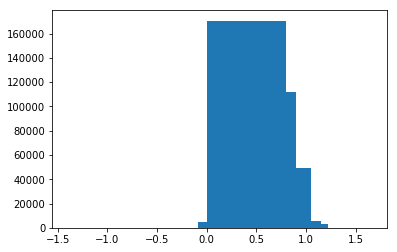

ps_car_13


<Container object of 70482 artists>

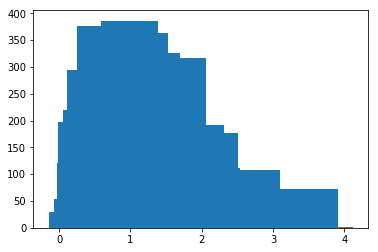

ps_car_14


<Container object of 850 artists>

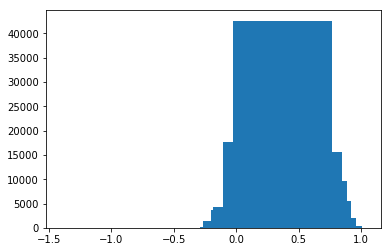

ps_car_15


<Container object of 15 artists>

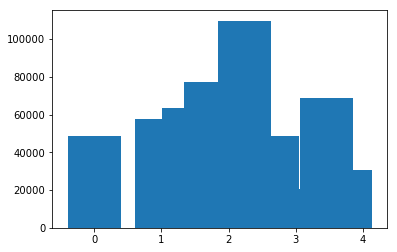

ps_calc_01


<Container object of 10 artists>

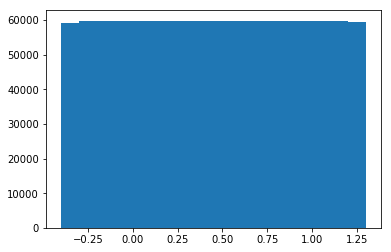

ps_calc_02


<Container object of 10 artists>

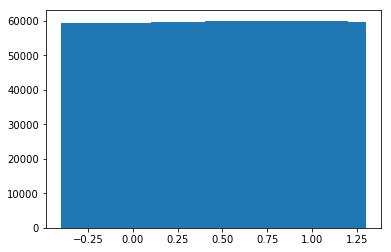

ps_calc_03


<Container object of 10 artists>

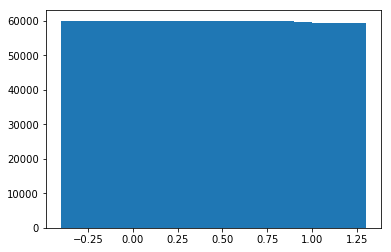

ps_calc_04


<Container object of 6 artists>

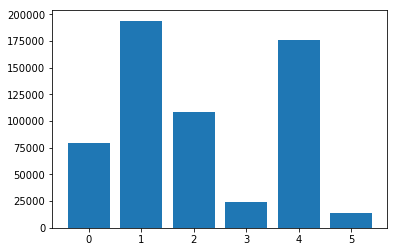

ps_calc_05


<Container object of 7 artists>

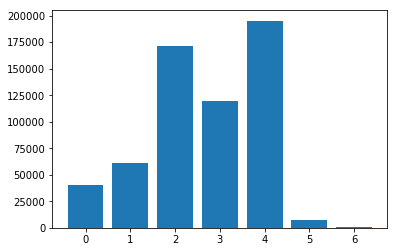

ps_calc_06


<Container object of 11 artists>

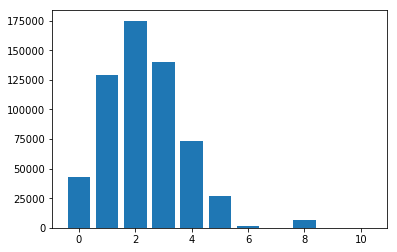

ps_calc_07


<Container object of 10 artists>

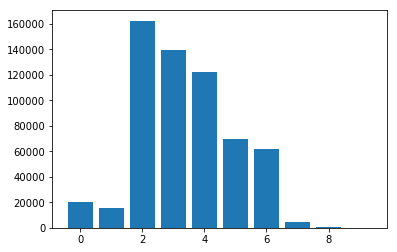

ps_calc_08


<Container object of 11 artists>

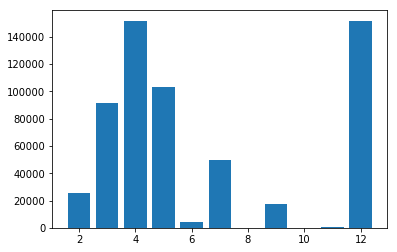

ps_calc_09


<Container object of 8 artists>

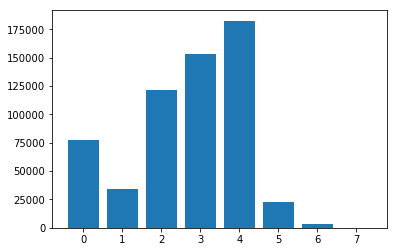

ps_calc_10


<Container object of 26 artists>

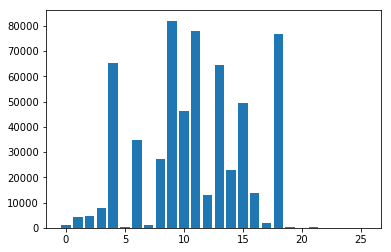

ps_calc_11


<Container object of 20 artists>

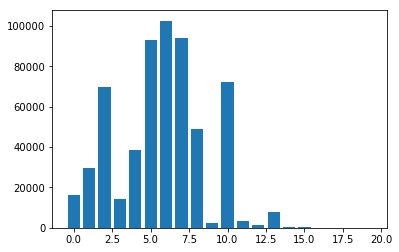

ps_calc_12


<Container object of 11 artists>

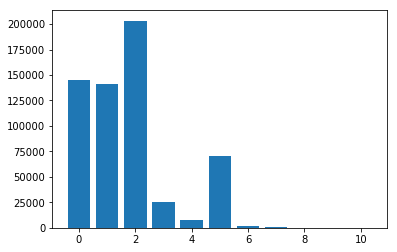

ps_calc_13


<Container object of 14 artists>

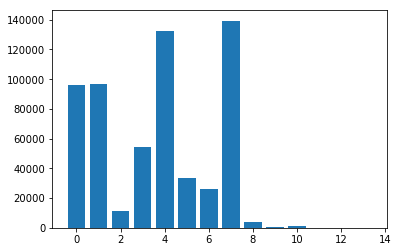

ps_calc_14


<Container object of 24 artists>

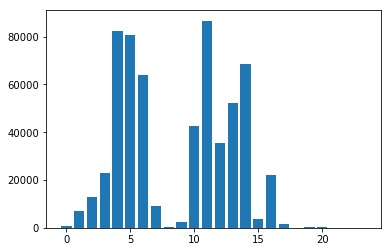

ps_calc_15_bin


<Container object of 2 artists>

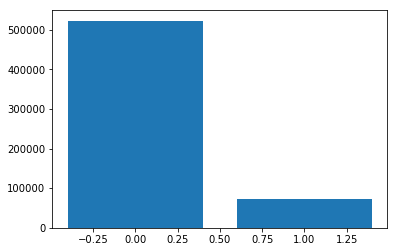

ps_calc_16_bin


<Container object of 2 artists>

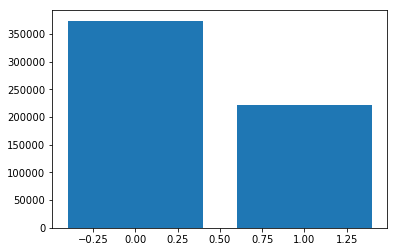

ps_calc_17_bin


<Container object of 2 artists>

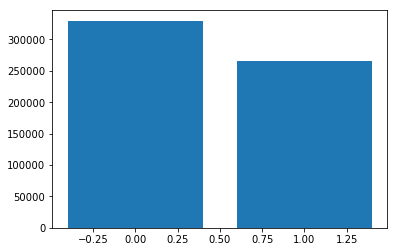

ps_calc_18_bin


<Container object of 2 artists>

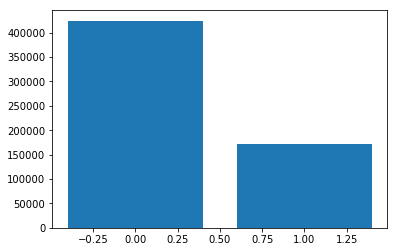

ps_calc_19_bin


<Container object of 2 artists>

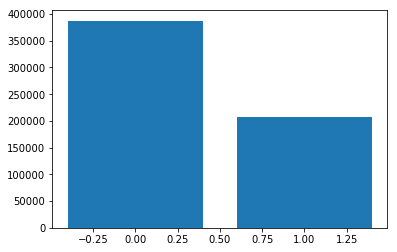

ps_calc_20_bin


<Container object of 2 artists>

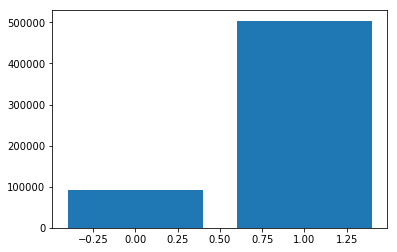

In [6]:
column_list = list(raw_data.columns)
for i in range(len(column_list)-2):
    print(column_list[i+2])
    plt.bar(raw_data[column_list[i+2]].unique(), raw_data.groupby(column_list[i+2])[column_list[0]].nunique() )
    plt.show()

In [66]:
column_list = list(raw_data.columns)
for i, cols in enumerate(column_list):
    print(cols,' ',list(raw_data[cols]).count(-1)/595212)

id   0.0
target   0.0
ps_ind_01   0.0
ps_ind_02_cat   0.0003628959093566662
ps_ind_03   0.0
ps_ind_04_cat   0.00013944611331760784
ps_ind_05_cat   0.00975954785857812
ps_ind_06_bin   0.0
ps_ind_07_bin   0.0
ps_ind_08_bin   0.0
ps_ind_09_bin   0.0
ps_ind_10_bin   0.0
ps_ind_11_bin   0.0
ps_ind_12_bin   0.0
ps_ind_13_bin   0.0
ps_ind_14   0.0
ps_ind_15   0.0
ps_ind_16_bin   0.0
ps_ind_17_bin   0.0
ps_ind_18_bin   0.0
ps_reg_01   0.0
ps_reg_02   0.0
ps_reg_03   0.18106489788512328
ps_car_01_cat   0.0001797678810239041
ps_car_02_cat   8.400368272145051e-06
ps_car_03_cat   0.6908983689844963
ps_car_04_cat   0.0
ps_car_05_cat   0.4478253126617071
ps_car_06_cat   0.0
ps_car_07_cat   0.019302366215734897
ps_car_08_cat   0.0
ps_car_09_cat   0.0009559619093701067
ps_car_10_cat   0.0
ps_car_11_cat   0.0
ps_car_11   8.400368272145051e-06
ps_car_12   1.68007365442901e-06
ps_car_13   0.0
ps_car_14   0.07160473915176441
ps_car_15   0.0
ps_calc_01   0.0
ps_calc_02   0.0
ps_calc_03   0.0
ps_calc_04   0

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [11]:
KNN_mod = KMeans(init='k-means++', n_clusters=3, n_init=10)

In [14]:
#KNN_mod.fit(raw_data)
#KNN_mod.cluster_centers_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([[  7.45004396e+05,   3.61656454e-02,   1.89680420e+00,
          1.35787209e+00,   4.42825828e+00,   4.16456704e-01,
          4.02861203e-01,   3.94420705e-01,   2.56843102e-01,
          1.64299968e-01,   1.84436225e-01,   4.18245586e-04,
          1.59739579e-03,   9.39288882e-03,   1.03805531e-03,
          1.24465855e-02,   7.29777574e+00,   6.62430460e-01,
          1.20379142e-01,   1.53319761e-01,   6.10970128e-01,
          4.39247057e-01,   5.48879337e-01,   8.28972829e+00,
          8.30655890e-01,  -5.04681327e-01,   7.23317947e-01,
         -1.59633758e-01,   6.55313735e+00,   9.10565992e-01,
          8.31996291e-01,   1.33102878e+00,   9.91992865e-01,
          6.22006873e+01,   2.34766286e+00,   3.79902706e-01,
          8.13364722e-01,   2.76339557e-01,   3.06713577e+00,
          4.49176107e-01,   4.49533379e-01,   4.49993449e-01,
          2.37301963e+00,   1.88582903e+00,   7.68997420e+00,
          3.00749819e+00,   9.22981335e+00,   2.34179231e+00,
        

In [21]:
cluster = KNN_mod.cluster_centers_
len(cluster)
KNN_mod.labels_
KNN_mod.score
dat = raw_data
dat.label3 = KNN_mod.labels_

3

array([1, 1, 1, ..., 2, 2, 2])

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)>

In [27]:
KNN_mod = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_mod.fit(raw_data)
dat['label2'] = KNN_mod.labels_
dat_corr = dat.corr()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

In [28]:
#dat_corr

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,label2
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,...,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267,0.866018
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,...,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072,-0.000030
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,...,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464,0.000740
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,...,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070,0.000827
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,...,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709,-0.001094
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,...,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244,0.001298
ps_ind_05_cat,0.000022,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,...,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279,-0.000105
ps_ind_06_bin,-0.000093,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,...,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203,-0.000020
ps_ind_07_bin,0.002473,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,...,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961,0.002368
ps_ind_08_bin,-0.000479,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,...,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995,-0.000632


In [30]:
dat2 = raw_data.iloc[:,2:]
KNN_mod = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_mod.fit(dat2)
dat2['knn2_label'] = KNN_mod.labels_
dat2['target'] = raw_data.target
#dat2.corr()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,label2,knn2_label,target
ps_ind_01,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,...,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464,0.000740,0.000186,0.018570
ps_ind_02_cat,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,...,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070,0.000827,0.025252,0.004534
ps_ind_03,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,...,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709,-0.001094,-0.031672,0.008360
ps_ind_04_cat,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,...,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244,0.001298,0.013250,0.009360
ps_ind_05_cat,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,...,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279,-0.000105,-0.002188,0.029165
ps_ind_06_bin,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,...,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203,-0.000020,-0.016724,-0.034017
ps_ind_07_bin,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,-0.280513,0.010740,...,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961,0.002368,0.023094,0.034218
ps_ind_08_bin,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,-0.211173,0.006489,...,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995,-0.000632,0.062108,0.013147
ps_ind_09_bin,0.162800,0.110076,0.111306,-0.011442,-0.005069,-0.384345,-0.280513,-0.211173,1.000000,-0.006973,...,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123,-0.002036,-0.064120,-0.008237
ps_ind_10_bin,0.001847,-0.000744,0.006865,0.000789,0.001742,-0.008978,0.010740,0.006489,-0.006973,1.000000,...,0.000232,-0.003233,0.001012,0.000345,0.000240,0.001555,-0.003390,0.000011,0.004008,0.001815


In [68]:
y_hat = KNN_mod.fit_predict(X = raw_data.iloc[:,2:], y = raw_data.iloc[:,1])
y = raw_data.iloc[:,1]


In [35]:
y_bar = pd.DataFrame(data=y_hat, columns=['y_hat'])

In [55]:
dat2['y_hat'] = y_bar

len(dat2.ix[(dat2.y_hat == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])

0.5831105374757998

In [57]:
reduced_data = PCA(n_components=3).fit_transform(raw_data.iloc[:,2:])
KNN_PCA_mod = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_PCA_mod.fit(reduced_data)
y_hat_pca = KNN_PCA_mod.fit_predict(X = reduced_data, y = raw_data.iloc[:,1])
y_bar_pca = pd.DataFrame(data=y_hat_pca, columns=['y_hat_pca'])
dat2['y_hat_pca'] = y_bar_pca
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 0)])/len(dat2.ix[(dat2.target == 0)])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

0.4168894625242002

In [58]:
reduced_data = PCA(n_components=2).fit_transform(raw_data.iloc[:,2:])
KNN_PCA_mod = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_PCA_mod.fit(reduced_data)
y_hat_pca = KNN_PCA_mod.fit_predict(X = reduced_data, y = raw_data.iloc[:,1])
y_bar_pca = pd.DataFrame(data=y_hat_pca, columns=['y_hat_pca'])
dat2['y_hat_pca'] = y_bar_pca
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 0)])/len(dat2.ix[(dat2.target == 0)])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

0.4168894625242002

0.5726725229199432

In [59]:
reduced_data = PCA(n_components=4).fit_transform(raw_data.iloc[:,2:])
KNN_PCA_mod = KMeans(init='k-means++', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_PCA_mod.fit(reduced_data)
y_hat_pca = KNN_PCA_mod.fit_predict(X = reduced_data, y = raw_data.iloc[:,1])
y_bar_pca = pd.DataFrame(data=y_hat_pca, columns=['y_hat_pca'])
dat2['y_hat_pca'] = y_bar_pca
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 0)])/len(dat2.ix[(dat2.target == 0)])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

0.4168894625242002

0.5726725229199432

In [61]:
reduced_data = PCA(n_components=2).fit_transform(raw_data.iloc[:,2:])
reduced_data
KNN_PCA_mod = KMeans(init='random', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_PCA_mod.fit(reduced_data)
y_hat_pca = KNN_PCA_mod.fit_predict(X = reduced_data, y = raw_data.iloc[:,1])
y_bar_pca = pd.DataFrame(data=y_hat_pca, columns=['y_hat_pca'])
dat2['y_hat_pca'] = y_bar_pca
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 0)])/len(dat2.ix[(dat2.target == 0)])

array([[ 50.23311751,  -2.2754139 ],
       [ 43.19650693,   4.62724193],
       [  2.20348771,   7.41350445],
       ..., 
       [ 31.26424385,  -5.47116349],
       [-38.79773904,   4.33151652],
       [ 28.26019291,  -6.53810117]])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

0.5831105374757998

0.42732747708005675

In [62]:
reduced_data = PCA(n_components=3).fit_transform(raw_data.iloc[:,2:])
#reduced_data
KNN_PCA_mod = KMeans(init='random', n_clusters=2, n_init=10, max_iter=1000, tol=0.00001)
KNN_PCA_mod.fit(reduced_data)
y_hat_pca = KNN_PCA_mod.fit_predict(X = reduced_data, y = raw_data.iloc[:,1])
y_bar_pca = pd.DataFrame(data=y_hat_pca, columns=['y_hat_pca'])
dat2['y_hat_pca'] = y_bar_pca
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 1)])/len(dat2.ix[(dat2.target == 1)])
len(dat2.ix[(dat2.y_hat_pca == dat2.target) & (dat2.target == 0)])/len(dat2.ix[(dat2.target == 0)])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-05, verbose=0)

0.4168894625242002

0.5726725229199432

In [65]:
reduced_data

array([[ 50.23311751,  -2.27541389,  -3.60383368],
       [ 43.19650693,   4.62724193,   3.57682533],
       [  2.20348771,   7.41350445,  -6.06198302],
       ..., 
       [ 31.26424385,  -5.4711635 ,  -5.89485103],
       [-38.79773904,   4.33151652,  -4.53719409],
       [ 28.26019291,  -6.53810117,  -0.4721158 ]])

In [69]:
#create train-dev set
raw_data_set_test_idx = np.random.choice(len(raw_data), size = 50000, replace = False)
raw_data_set_test_tf = raw_data.index.isin(raw_data_set_test_idx)
dev_set = raw_data[raw_data_set_test_tf]
train_set = raw_data[~raw_data_set_test_tf]

In [70]:
C_list = [0.00001,0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1]
class_weights = [{0:0.5, 1:0.5}, {0:0.3, 1:0.7},{0:0.1, 1:0.9},{0:0.05,1:0.95}]
grids = {'C':[],'weights_on_1':[],'train_set_score':[], 'train_set_false_true':[], 'dev_set_score':[], 'dev_set_false_true':[]}

for i, c in enumerate(C_list):
    for j, w in enumerate(class_weights):
        grids['C'].append(c)
        grids['weights_on_1'].append(w)
        clf_l1_LogitReg = LogisticRegression(C=c,class_weight = w, penalty='l1', tol=0.0001, max_iter = 1000)
        logit_l1 = clf_l1_LogitReg.fit(train_set.iloc[:,2:], train_set.iloc[:,1])
        grids['train_set_score'].append(logit_l1.score(train_set.iloc[:,2:], train_set.iloc[:,1]))
        compare_df = pd.DataFrame({'y':train_set.target, 'y_hat':logit_l1.predict(train_set.iloc[:,2:])})
        grids['train_set_false_true'].append(len(compare_df.ix[(compare_df.y_hat == compare_df.y) & (compare_df.y == 1)])/len(compare_df.ix[(compare_df.y == 1)]))
        
        grids['dev_set_score'].append(logit_l1.score(dev_set.iloc[:,2:], dev_set.iloc[:,1]))
        compare_df = pd.DataFrame({'y':dev_set.target, 'y_hat':logit_l1.predict(dev_set.iloc[:,2:])})
        grids['dev_set_false_true'].append(len(compare_df.ix[(compare_df.y_hat == compare_df.y) & (compare_df.y == 1)])/len(compare_df.ix[(compare_df.y == 1)]))
        
pd.DataFrame(grids)

,C,dev_set_false_true,dev_set_score,train_set_false_true,train_set_score,weights_on_1
0,0.00001,0.000000,0.96404,0.000000,0.963508,"{0: 0.5, 1: 0.5}"
1,0.00001,0.000000,0.96404,0.000000,0.963508,"{0: 0.3, 1: 0.7}"
2,0.00001,0.000000,0.96404,0.000000,0.963508,"{0: 0.1, 1: 0.9}"
3,0.00001,0.000000,0.96404,0.000000,0.963508,"{0: 0.05, 1: 0.95}"
4,0.00010,0.000000,0.96404,0.000000,0.963508,"{0: 0.5, 1: 0.5}"
5,0.00010,0.000000,0.96404,0.000000,0.963508,"{0: 0.3, 1: 0.7}"
6,0.00010,0.000000,0.96404,0.000000,0.963508,"{0: 0.1, 1: 0.9}"
7,0.00010,0.000000,0.96404,0.000000,0.963508,"{0: 0.05, 1: 0.95}"
8,0.00100,0.000000,0.96404,0.000000,0.963508,"{0: 0.5, 1: 0.5}"
9,0.00100,0.000000,0.96404,0.000000,0.963508,"{0: 0.3, 1: 0.7}"


In [ ]:
C_list = [0.01, 0.1, 0.25, 0.5, 1, 2, 5]
class_weights = [{0:0.3, 1:0.7},{0:0.1, 1:0.9},{0:0.05,1:0.95}, {0:0.03, 1:0.97}]
grids2 = {'C':[],'weights_on_1':[],'train_set_score':[], 'train_set_false_true':[], 'dev_set_score':[], 'dev_set_false_true':[]}

for i, c in enumerate(C_list):
    for j, w in enumerate(class_weights):
        grids['C'].append(c)
        grids['weights_on_1'].append(w)
        clf_l1_LogitReg = LogisticRegression(C=c,class_weight = w, penalty='l1', tol=0.0001, max_iter = 1000)
        logit_l1 = clf_l1_LogitReg.fit(train_set.iloc[:,2:], train_set.iloc[:,1])
        grids['train_set_score'].append(logit_l1.score(train_set.iloc[:,2:], train_set.iloc[:,1]))
        compare_df = pd.DataFrame({'y':train_set.target, 'y_hat':logit_l1.predict(train_set.iloc[:,2:])})
        grids['train_set_false_true'].append(len(compare_df.ix[(compare_df.y_hat == compare_df.y) & (compare_df.y == 1)])/len(compare_df.ix[(compare_df.y == 1)]))
        
        grids['dev_set_score'].append(logit_l1.score(dev_set.iloc[:,2:], dev_set.iloc[:,1]))
        compare_df = pd.DataFrame({'y':dev_set.target, 'y_hat':logit_l1.predict(dev_set.iloc[:,2:])})
        grids['dev_set_false_true'].append(len(compare_df.ix[(compare_df.y_hat == compare_df.y) & (compare_df.y == 1)])/len(compare_df.ix[(compare_df.y == 1)]))
        
pd.DataFrame(grids2)